In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import mpld3

mpld3.enable_notebook()

import os

In [2]:
data_path = os.path.join('.','data','green_sample_benchmark.xlsx')

data_arch = pd.read_excel(data_path, sheet_name = 'archimedes')
data_arch.head()

,batch,ID,powder type,dry weight,wet coated,coated weight,exp,operator
0,4,3.0,Unimodal,14.8038,13.2572,15.9512,1,1
1,4,3.0,Unimodal,14.7935,13.2525,15.9485,1,1
2,4,8.0,Unimodal,15.2090,13.6240,16.3252,1,1
3,4,8.0,Unimodal,15.2038,13.6184,16.3211,1,1
4,4,14.0,Unimodal,15.3370,13.7548,16.4814,1,1


In [3]:
exp_param_arch = pd.read_excel(data_path, sheet_name = 'arch_param')
exp_param_arch.head()

,exp,density isopropanol
0,1,0.7842
1,2,0.7842
2,2,0.7838


In [4]:
full_data = data_arch.merge(exp_param_arch, how = 'outer', on = 'exp')
full_data.head()

,batch,ID,powder type,dry weight,wet coated,coated weight,exp,operator,density isopropanol
0,4,3.0,Unimodal,14.8038,13.2572,15.9512,1,1,0.7842
1,4,3.0,Unimodal,14.7935,13.2525,15.9485,1,1,0.7842
2,4,8.0,Unimodal,15.2090,13.6240,16.3252,1,1,0.7842
3,4,8.0,Unimodal,15.2038,13.6184,16.3211,1,1,0.7842
4,4,14.0,Unimodal,15.3370,13.7548,16.4814,1,1,0.7842


In [5]:
agg_mean = full_data.groupby(['batch','ID','exp','operator','powder type']).mean()
agg_mean.head()

dry weight  wet coated  coated weight  \
batch ID   exp operator powder type                                          
3     5.0  2   2        Unimodal       15.43500    13.79635       16.54605   
4     3.0  1   1        Unimodal       14.79865    13.25485       15.94985   
      8.0  1   1        Unimodal       15.20640    13.62120       16.32315   
      10.0 2   2        Unimodal       15.63520    13.95825       16.71045   
      14.0 1   1        Unimodal       15.33670    13.75350       16.47950   

                                     density isopropanol  
batch ID   exp operator powder type                       
3     5.0  2   2        Unimodal                  0.7840  
4     3.0  1   1        Unimodal                  0.7842  
      8.0  1   1        Unimodal                  0.7842  
      10.0 2   2        Unimodal                  0.7840  
      14.0 1   1        Unimodal                  0.7842

In [6]:
def compute_density(row):
    return row['dry weight']/(row['coated weight']-row['wet coated'])*row['density isopropanol']

density_df_mean = agg_mean.apply(compute_density, axis = 1)

In [7]:
def bootstrap(df):
    unimodal_data = df.xs('Unimodal', level = 'powder type')
    bimodal_data = df.xs('Bimodal', level = 'powder type')

    bootstrap_mean_unimodal = []
    bootstrap_mean_bimodal = []

    for _ in range(10000):
        bootstrap_mean_unimodal.append(unimodal_data.sample(30, replace = True).mean())
        bootstrap_mean_bimodal.append(bimodal_data.sample(30, replace = True).mean())
        
    return bootstrap_mean_unimodal, bootstrap_mean_bimodal

mean_unimodal_dist, mean_bimodal_dist = bootstrap(density_df_mean)

In [8]:
agg_median = full_data.groupby(['batch','ID','exp','operator','powder type']).median()
agg_median.head()

dry weight  wet coated  coated weight  \
batch ID   exp operator powder type                                          
3     5.0  2   2        Unimodal       15.43500    13.79635       16.54605   
4     3.0  1   1        Unimodal       14.79865    13.25485       15.94985   
      8.0  1   1        Unimodal       15.20640    13.62120       16.32315   
      10.0 2   2        Unimodal       15.63520    13.95825       16.71045   
      14.0 1   1        Unimodal       15.33670    13.75350       16.47950   

                                     density isopropanol  
batch ID   exp operator powder type                       
3     5.0  2   2        Unimodal                  0.7840  
4     3.0  1   1        Unimodal                  0.7842  
      8.0  1   1        Unimodal                  0.7842  
      10.0 2   2        Unimodal                  0.7840  
      14.0 1   1        Unimodal                  0.7842

In [9]:
density_df_median = agg_median.apply(compute_density, axis = 1)
density_df_median

batch  ID    exp  operator  powder type
3      5.0   2    2         Unimodal       4.400858
4      3.0   1    1         Unimodal       4.306160
       8.0   1    1         Unimodal       4.413427
       10.0  2    2         Unimodal       4.453890
       14.0  1    1         Unimodal       4.411974
       15.0  2    2         Unimodal       4.402546
5      0.1   1    1         Unimodal       4.372079
       0.2   1    1         Unimodal       4.379113
       0.3   1    1         Unimodal       4.535364
       0.4   1    1         Unimodal       4.469684
6      4.0   1    1         Bimodal        4.661019
       7.0   1    1         Bimodal        4.494957
       8.0   2    2         Bimodal        4.442289
       10.0  1    1         Bimodal        4.534543
       13.0  1    1         Bimodal        4.478516
       14.0  2    2         Bimodal        4.428056
7      2.0   1    1         Bimodal        4.552509
       5.0   1    1         Bimodal        4.528965
       9.0   2    2     

In [10]:
median_unimodal_dist, median_bimodal_dist = bootstrap(density_df_median)

In [11]:
agg_min = full_data.groupby(['batch','ID','exp','operator','powder type']).min()
density_df_min = agg_min.apply(compute_density, axis = 1)

In [12]:
min_unimodal_dist, min_bimodal_dist = bootstrap(density_df_min)

In [13]:
agg_max = full_data.groupby(['batch','ID','exp','operator','powder type']).max()
density_df_max = agg_max.apply(compute_density, axis = 1)
max_unimodal_dist, max_bimodal_dist = bootstrap(density_df_max)

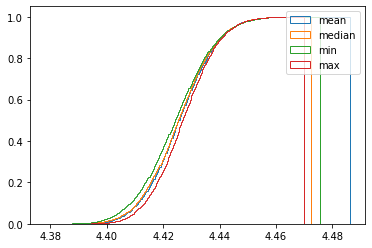

In [14]:
n_bins = 256
fig, ax = plt.subplots()
ax.hist(mean_unimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='mean')
ax.hist(median_unimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='median')
ax.hist(min_unimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='min')
ax.hist(max_unimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='max')
ax.legend()
plt.show()

In [15]:
stats.ks_2samp(min_unimodal_dist, max_unimodal_dist)

Ks_2sampResult(statistic=0.1113, pvalue=2.472032383021569e-54)

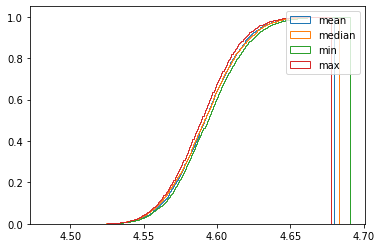

In [16]:
n_bins = 256
fig, ax = plt.subplots()
ax.hist(mean_bimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='mean')
ax.hist(median_bimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='median')
ax.hist(min_bimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='min')
ax.hist(max_bimodal_dist, n_bins, density=True, histtype='step', cumulative=True, label='max')
ax.legend()
plt.show()

In [17]:
stats.ks_2samp(min_bimodal_dist, max_bimodal_dist)

Ks_2sampResult(statistic=0.0747, pvalue=1.1107942753711278e-24)